<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#00.-추천시스템-이해" data-toc-modified-id="00.-추천시스템-이해-0">00. 추천시스템 이해</a></span><ul class="toc-item"><li><span><a href="#1.-Apriori-알고리즘" data-toc-modified-id="1.-Apriori-알고리즘-0.1">1. Apriori 알고리즘</a></span><ul class="toc-item"><li><span><a href="#1.1-원리" data-toc-modified-id="1.1-원리-0.1.1">1.1 원리</a></span></li><li><span><a href="#1.2-Apriori-알고리즘--장단점" data-toc-modified-id="1.2-Apriori-알고리즘--장단점-0.1.2">1.2 Apriori 알고리즘 -장단점</a></span></li></ul></li><li><span><a href="#2.-FP-Growth-알고리즘" data-toc-modified-id="2.-FP-Growth-알고리즘-0.2">2. FP-Growth 알고리즘</a></span><ul class="toc-item"><li><span><a href="#2.1-원리" data-toc-modified-id="2.1-원리-0.2.1">2.1 원리</a></span></li><li><span><a href="#2.2-FP-Growth-알고리즘---장단점" data-toc-modified-id="2.2-FP-Growth-알고리즘---장단점-0.2.2">2.2 FP-Growth 알고리즘 - 장단점</a></span></li><li><span><a href="#2.3-fpgrowth에서-신뢰도나-향상도를-데이터프레임에서-확인하려면?" data-toc-modified-id="2.3-fpgrowth에서-신뢰도나-향상도를-데이터프레임에서-확인하려면?-0.2.3">2.3 fpgrowth에서 신뢰도나 향상도를 데이터프레임에서 확인하려면?</a></span></li></ul></li></ul></li></ul></div>

# 00. 추천시스템 이해

## 1. Apriori 알고리즘
- 기본적인 아이디어는 '빈번한 아이템셋은 하위 아이템셋 또한 빈번할 것이다'. 즉, '빈번하지 않은 아이템셋은 하위 아이템셋 또한 빈번하지 않다'를 이용해서 아이템셋의 증가를 줄이는 방법이다.

### 1.1 원리
1. k개의 item을 가지고 단일항목집단 생성 (one-item frequent set)
2. 단일항목집단에서 최소 지지도(support)이상의 항목만 선택
3. 2에서 선택된 항목만을 대상으로 2개항목집단 생성
4. 2개항목집단에서 최소 지지도 혹은 신뢰도 이상의 항목만 선택
5. 위의 과정을 k개의 k-item-frequent set을 생성할 때까지 반복

In [1]:
import mlxtend
import numpy as np
import pandas as pd

In [2]:
data = np.array([
                 ['우유', '기저귀', '쥬스'],
                 ['양상추', '기저귀', '맥주'],
                 ['우유', '양상추', '기저귀', '맥주'],
                 ['양상추', '맥주']
])

C:\Users\woo56\anaconda3\lib\site-packages\ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


In [3]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,기저귀,맥주,양상추,우유,쥬스
0,True,False,False,True,True
1,True,True,True,False,False
2,True,True,True,True,False
3,False,True,True,False,False


In [4]:
%%time 
from mlxtend.frequent_patterns import apriori

apriori(df, min_support=0.5, use_colnames=True) # min_support : 최소 지지도

Wall time: 27 ms


,support,itemsets
0,0.75,(기저귀)
1,0.75,(맥주)
2,0.75,(양상추)
3,0.50,(우유)
4,0.50,"(맥주, 기저귀)"
5,0.50,"(양상추, 기저귀)"
6,0.50,"(기저귀, 우유)"
7,0.75,"(양상추, 맥주)"
8,0.50,"(양상추, 맥주, 기저귀)"


### 1.2 Apriori 알고리즘 -장단점
- 장점
    - 원리가 간단하여 사용자가 쉽게 이해할 수 있고 의미를 파악할 수 있다.
    - 유의한 연관성을 갖는 구매패턴을 찾아준다.
- 단점
    - 데이터가 클 경우 (item이 많은 경우)에 속도가 느리고 연산량이 많다.
    - 실제 사용시에 많은 연관상품들이 나타나는 단점들이 있다.

## 2. FP-Growth 알고리즘
- FP Growth는 이전에 언급한 Apriori의 속도측면의 단점을 개선한 알고리즘이다. Apriori와 비슷한 성능을 내지만 **FP Tree** 구조를 사용해서 빠른 속도를 가진다는게 장점이다. 하지만, 동일하게 발생하는 아이템셋(frequent itemsets)을 찾는데는 좋지만 **아이템간의 연관성**을 찾는 것은 어렵다는 단점이 있다.<br><br>
- FP Tree 구조
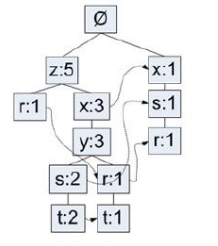

### 2.1 원리
1. 모든 거래를 확인하여, 각 아이템마다의 지지도(support)를 계산하고 최소 지지도이상의 아이템만 선택
2. 모든 거래에서 빈도가 높은 아이템 순서대로 순서를 정렬
3. 부모 노드를 중심으로 거래를 자식 노드로 추가해주면서 tree를 생성
4. 새로운 아이템이 나올 경우에는 부모 노드부터 시작하고, 그렇지 않으면 기존의 노드에서 확장
5. 위의 과정을 모든 거래에 대해 반복하여 FP TREE를 만들고 최소 지지도 이상의 패턴만을 추출

In [5]:
data = np.array([
    ['우유', '기저귀', '쥬스'],
    ['양상추', '기저귀', '맥주'],
    ['우유', '양상추', '기저귀', '맥주'],
    ['양상추', '맥주']
])

C:\Users\woo56\anaconda3\lib\site-packages\ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


In [6]:
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,기저귀,맥주,양상추,우유,쥬스
0,True,False,False,True,True
1,True,True,True,False,False
2,True,True,True,True,False
3,False,True,True,False,False


In [7]:
%%time
from mlxtend.frequent_patterns import fpgrowth

fpgrowth(df, min_support=0.5, use_colnames=True)

Wall time: 2.99 ms


,support,itemsets
0,0.75,(기저귀)
1,0.50,(우유)
2,0.75,(양상추)
3,0.75,(맥주)
4,0.50,"(맥주, 기저귀)"
5,0.50,"(양상추, 기저귀)"
6,0.50,"(양상추, 맥주, 기저귀)"
7,0.50,"(기저귀, 우유)"
8,0.75,"(양상추, 맥주)"


### 2.2 FP-Growth 알고리즘 - 장단점
1. 장점 
    - Apriori 알고리즘보다 빠르고 2번의 탐색만 필요로 함
    - 후보 Itemsets를 생성할 필요없이 진행 가능
2. 단점
    - 대용량의 데이터셋에서 메모리를 효율적으로 사용하지 않음
    - Apriori 알고리즘에 비해서 설계하기 어려움
    - 지지도의 계산이 FP-Tree가 만들어지고 나서야 가능함

### 2.3 fpgrowth에서 신뢰도나 향상도를 데이터프레임에서 확인하려면?

In [8]:
from mlxtend.frequent_patterns import association_rules

association = fpgrowth(df, min_support=0.5, use_colnames=True)
association_rules(association,
                metric = 'confidence',
                min_threshold = 0.5,
                support_only = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(맥주),(기저귀),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75
1,(기저귀),(맥주),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75
2,(양상추),(기저귀),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75
3,(기저귀),(양상추),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75
4,"(양상추, 맥주)",(기저귀),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75
5,"(양상추, 기저귀)",(맥주),0.50,0.75,0.50,1.000000,1.333333,0.1250,inf
6,"(맥주, 기저귀)",(양상추),0.50,0.75,0.50,1.000000,1.333333,0.1250,inf
7,(양상추),"(맥주, 기저귀)",0.75,0.50,0.50,0.666667,1.333333,0.1250,1.50
8,(맥주),"(양상추, 기저귀)",0.75,0.50,0.50,0.666667,1.333333,0.1250,1.50
9,(기저귀),"(양상추, 맥주)",0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75
